<a href="https://colab.research.google.com/github/thoufiqz55/Auctioned_car/blob/main/Used_cars_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Don't Get Kicked

![](https://i.imgur.com/Y0X8dsA.jpg)

### Prdicting whether the purchase in the auction is a good or bad buy.

## Introduction

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

In this project we will see the cars which has higher risk of being kick, which can help real value for dealership and provide best selection for the customers,

We will take a look at real world data for 150,000 customers and use machine learning techniques to build the models.

# Data Description

**All the features in the data set are defined as follows:**

- `RefID`: Unique (sequential) number assigned to vehicles
- `IsBadBuy`: Identifies if the kicked vehicle was an avoidable purchase
- `PurchDate`: The Date the vehicle was Purchased at Auction
- `Auction`: Auction provider at which the vehicle was purchased
- `VehYear`: The manufacturer's year of the vehicle
- `VehicleAge`: The Years elapsed since the manufacturer's year
- `Make`: Vehicle Manufacturer
- `Model`: Vehicle Model
- `Trim`: Vehicle Trim Level
- `SubModel`: Vehicle Submodel
- `Color`: Vehicle Color
- `Transmission`: Vehicles transmission type (Automatic, Manual)
- `WheelTypeID`: The type id of the vehicle wheel
- `WheelType`: The vehicle wheel type description (Alloy, Covers)
- `VehOdo`: The vehicles odometer reading
- `Nationality`: The Manufacturer's country
- `Size`: The size category of the vehicle (Compact, SUV, etc.)
- `TopThreeAmericanName`: Identifies if the manufacturer is one of the top three - American manufacturers
- `MMRAcquisitionAuctionAveragePrice`: Acquisition price for this vehicle in - average condition at time of purchase
- `MMRAcquisitionAuctionCleanPrice`: Acquisition price for this vehicle in the above Average condition at time of purchase
- `MMRAcquisitionRetailAveragePrice`: Acquisition price for this vehicle in the retail market in average condition at time of purchase
- `MMRAcquisitonRetailCleanPrice`: Acquisition price for this vehicle in the retail market in above average condition at time of purchase
- `MMRCurrentAuctionAveragePrice`: Acquisition price for this vehicle in average condition as of current day
- `MMRCurrentAuctionCleanPrice`: Acquisition price for this vehicle in the above condition as of current day
- `MMRCurrentRetailAveragePrice`: Acquisition price for this vehicle in the retail market in average condition as of current day
- `MMRCurrentRetailCleanPrice`: Acquisition price for this vehicle in the retail market in above average condition as of current day
- `PRIMEUNIT`: Identifies if the vehicle would have a higher demand than a standard purchase
- `AcquisitionType`: Identifies how the vehicle was aquired (Auction buy, trade in, etc)
- `AUCGUART`: The level guarantee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
- `KickDate`: Date the vehicle was kicked back to the auction
- `BYRNO`: Unique number assigned to the buyer that purchased the vehicle
- `VNZIP`: Zipcode where the car was purchased
- `VNST`: State where the the car was purchased
- `VehBCost`: Acquisition cost paid for the vehicle at time of purchase
- `IsOnlineSale`: Identifies if the vehicle was originally purchased online
- `WarrantyCost`: Warranty price (term=36month and millage=36K)

In this data we have 32 independent variables and we have the target variable which we have to predict is `IsBadBuy`.



# Project Outline

**Steps that we follow:**

-  Installing and importing all the required libraries.
-  Downloading the data set from Kaggle.
-  Exploratory Data Analysis.
- Feature Engineering.
- Prepare the Dataset for ML Training.
- Train Hardcoded & Baseline Model.
- Train & Evaluate different Models.
- Hyperparameter Tuning.
- Final Model.
- Summary
- Future Work ideas

## Installing and immporting all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import plotly.express as px

In [2]:
pip install opendatasets

In [ ]:
import opendatasets as od


In [ ]:
pip install opendatasets

## Downloading the Data

We'll use the `opendatasets` library to download the data from Kagggle directly with Jupyter or Colab.The dataset can be downloaded using `od.download`.

In [ ]:
url = 'https://www.kaggle.com/competitions/DontGetKicked/data'

In [ ]:
od.download(url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


In [ ]:
os.listdir('./DontGetKicked')

['example_entry.csv',
 'Carvana_Data_Dictionary.txt',
 'test.csv',
 'training.csv',
 'test.zip',
 'training.zip']

In [ ]:
train_df = pd.read_csv('DontGetKicked/training.csv')
test_df = pd.read_csv('DontGetKicked/test.csv')

# Exploratory Data Analysis

We have the dataset downloaded and loaded in the dataframe. Let's check the data we have. We have train.csv which contains the training data and test.csv for testing the data.

In [ ]:
train_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel  ...  \
0                    MAZDA3    i         4D SEDAN I  ...   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                      NEON  SXT           4D SEDAN  ...   
4                     FOCUS  ZX3       2D COUPE ZX3  ...   
...                     ...  ...                ...  ...   
72978                 SABLE   GS        4D SEDAN GS  ...   
72979             MALIBU 4C   LS        4D SEDAN LS  ...   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  ...   
72981                IMPALA   LS        4D SEDAN LS  ...   
72982                MAZDA6    s         4D SEDAN S  ...   

      MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT  \
0                          11597.0                    12409.0        NaN   
1                          11374.0                    12791.0        NaN   
2                           7146.0                     8702.0        NaN   
3                           4375.0                     5518.0        NaN   
4                           6739.0                     7911.0        NaN   
...                            ...                        ...        ...   
72978                       4836.0                     5937.0        NaN   
72979                      10151.0                    11652.0        NaN   
72980                      11831.0                    14402.0        NaN   
72981                      10099.0                    11228.0        NaN   
72982                      11954.0                    13246.0        NaN   

      AUCGUART  BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0          NaN  21973  33619   FL   7100.0             0          1113  
1          NaN  19638  33619   FL   7600.0             0          1053  
2          NaN  19638  33619   FL   4900.0             0          1389  
3          NaN  19638  33619   FL   4100.0             0           630  
4          NaN  19638  33619   FL   4000.0             0          1020  
...        ...    ...    ...  ...      ...           ...           ...  
72978      NaN  18111  30212   GA   4200.0             0           993  
72979      NaN  18881  30212   GA   6200.0             0          1038  
72980      NaN  18111  30212   GA   8200.0             0          1893  
72981      NaN  18881  30212   GA   7000.0             0          1974  
72982      NaN  18111  30212   GA   8000.0             0          1313  

[72983 rows x 34 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [ ]:
test_df

RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
0       73015   12/2/2009    ADESA     2005           4    PONTIAC   
1       73016   12/2/2009    ADESA     2005           4  CHEVROLET   
2       73017   12/2/2009    ADESA     2006           3      DODGE   
3       73018   12/2/2009    ADESA     2002           7     SATURN   
4       73019   12/2/2009    ADESA     2007           2    HYUNDAI   
...       ...         ...      ...      ...         ...        ...   
48702  121742  11/17/2010  MANHEIM     2005           5       FORD   
48703  121743  11/17/2010  MANHEIM     2007           3     TOYOTA   
48704  121744  11/17/2010  MANHEIM     2006           4        KIA   
48705  121745  11/17/2010  MANHEIM     2005           5      MAZDA   
48706  121746  11/17/2010  MANHEIM     2003           7      BUICK   

                Model Trim                SubModel   Color  ...  \
0          GRAND PRIX  Bas                4D SEDAN  SILVER  ...   
1           MALIBU V6   LS             4D SEDAN LS  SILVER  ...   
2      DURANGO 2WD V8  Adv  4D SUV 4.7L ADVENTURER  SILVER  ...   
3            L SERIES  L20           4D SEDAN L200    GOLD  ...   
4              ACCENT   GS             2D COUPE GS    BLUE  ...   
...               ...  ...                     ...     ...  ...   
48702    FIVE HUNDRED  SEL            4D SEDAN SEL   BLACK  ...   
48703         COROLLA   CE             4D SEDAN CE   GREEN  ...   
48704         SPECTRA   EX             4D SEDAN EX   BLACK  ...   
48705          MAZDA3    s             4D SEDAN GT  SILVER  ...   
48706  RENDEZVOUS AWD   CX               4D SUV CX    GOLD  ...   

      MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                           8557.0                      9752.0       NaN   
1                           7562.0                      9296.0       NaN   
2                          15340.0                     16512.0       NaN   
3                           5725.0                      6398.0       NaN   
4                           5914.0                      7350.0       NaN   
...                            ...                         ...       ...   
48702                       9764.0                     11395.0       NaN   
48703                      10283.0                     11565.0       NaN   
48704                       7871.0                      9490.0        NO   
48705                       8576.0                      9937.0        NO   
48706                       8266.0                      9388.0        NO   

       AUCGUART  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0           NaN  18881  30212   GA    6500.0             0          2152  
1           NaN  18111  30212   GA    6300.0             0          1118  
2           NaN  18111  30212   GA    9700.0             0          1215  
3           NaN  18881  30212   GA    4150.0             0          1933  
4           NaN  18111  30212   GA    4100.0             0           920  
...         ...    ...    ...  ...       ...           ...           ...  
48702       NaN  20928  33411   FL    7955.0             0          1633  
48703       NaN  20928  33411   FL    7035.0             0           594  
48704     GREEN  20928  33411   FL    6335.0             0           594  
48705     GREEN  20928  33411   FL    8055.0             0          1038  
48706     GREEN  20928  33411   FL    7755.0             0          5392  

[48707 rows x 33 columns]

We can see that training set has 34 columns and test set has 33 columns.

Text(0.5, 1.0, 'Is a Bad Buy')

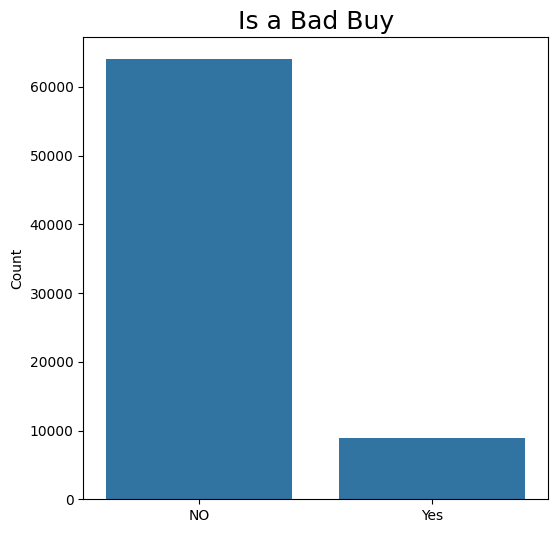

In [ ]:
a = train_df.IsBadBuy.value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=['NO','Yes'],y=a)
plt.ylabel('Count')
plt.title("Is a Bad Buy", fontsize = 18)

**Insights**: In this dataset our target variable is `IsBadBuy`, by analysing the target variable we can see that there are 64K values stating its a good buy and 9K stating its a Bad buy.Hence our data is Imbalanced.

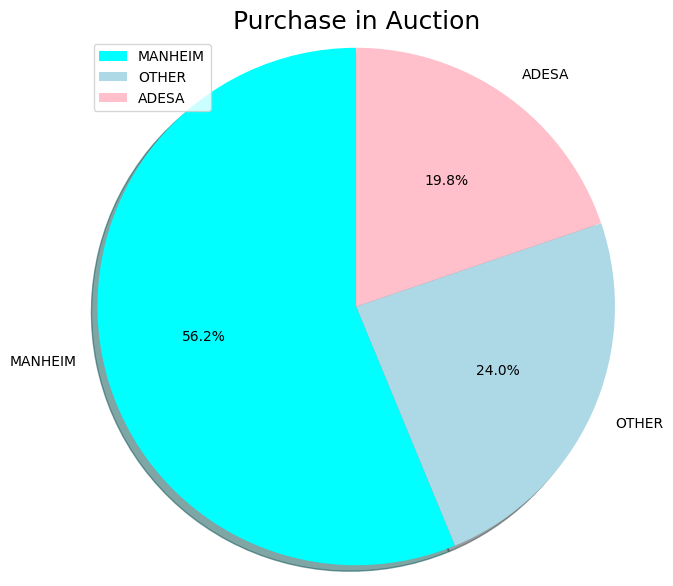

In [ ]:
b = train_df.Auction.value_counts()
colors = ['cyan', 'lightblue','pink']
plt.figure(figsize=(7,7))
plt.title('Purchase in Auction',fontsize=18)
plt.pie(b,colors=colors,
        labels =['MANHEIM','OTHER','ADESA'],
        autopct = '%1.1f%%',startangle=90,shadow=True,
       radius = 1.2,explode = (0, 0.0005,0))
plt.legend();

By seeing this chart we can tell that `Manheim` is the Auction place where maximum number of vehicles purchased in the auction.

Text(0.5, 1.0, 'Vehicle Age')

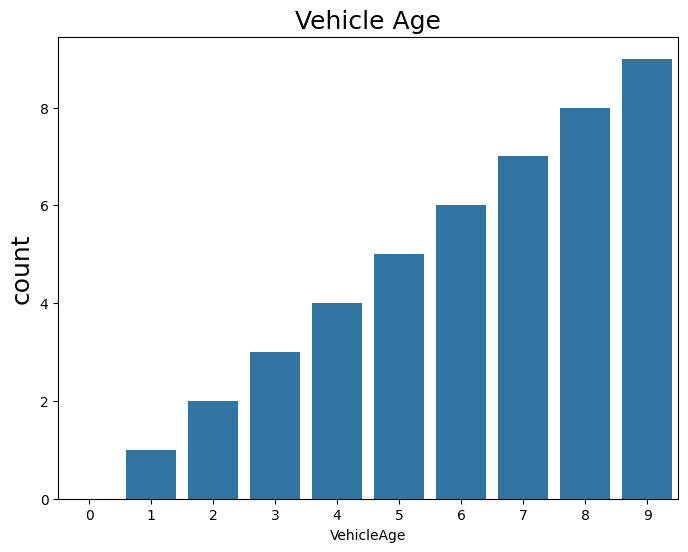

In [ ]:
age = pd.DataFrame(train_df.VehicleAge.value_counts())
plt.figure(figsize=(8,6))
sns.barplot(x=age.index,y='VehicleAge',data=age)
plt.ylabel('count',fontsize=18)
plt.title('Vehicle Age',fontsize=18)

Insights: We can see that people prefer to buy the vehicle age of 3 & 4 regarding the counts

Text(0.5, 1.0, 'Make')

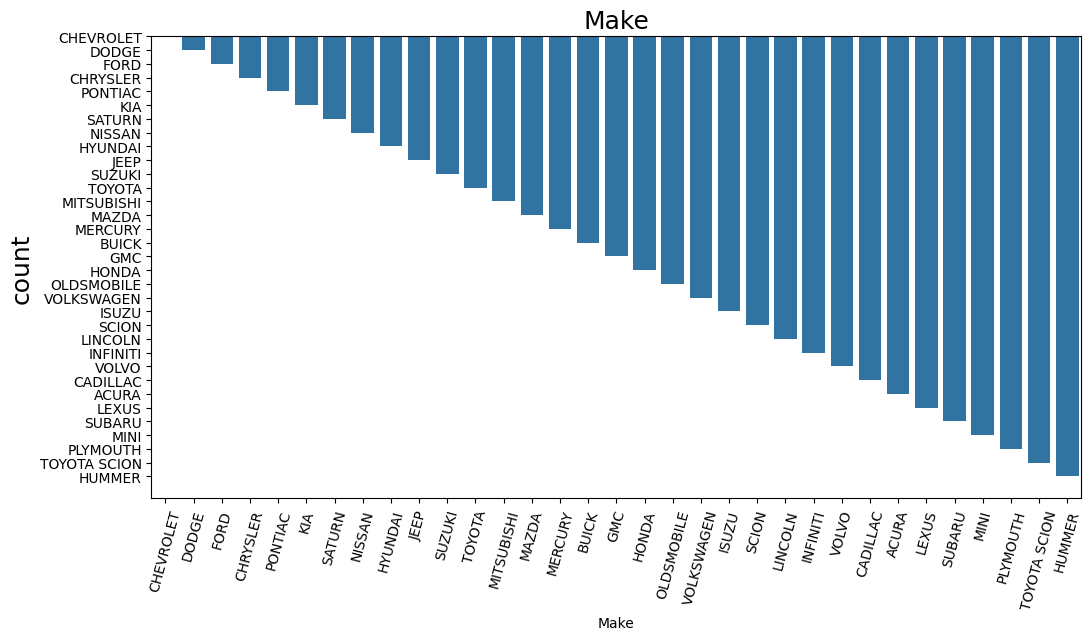

In [ ]:
make = pd.DataFrame(train_df.Make.value_counts())
plt.figure(figsize=(12,6))
sns.barplot(x=make.index,y='Make',data=make)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation=75)
plt.title('Make',fontsize=18)

Insights: Chevrolet is the company which people have purchased the vehicle a lot.

In [ ]:
px.histogram(train_df, x="VehicleAge", color='IsBadBuy')

Insights: Distibutions of vehicle age with the purchase was a good or bad.

In [ ]:
px.histogram(train_df, x= "Make", color='IsBadBuy',width=1000)

Insights: Chevrolet and Dodge are the companies which are in high demand of the market.

In [ ]:
px.histogram(train_df, x= "Nationality", color='IsBadBuy')

Insights: Seems like vehicle of America has been purchased a lot and it has the higher demand.

In [ ]:
px.histogram(train_df, x= "Size", color='IsBadBuy')

Insights: Majority of the People prefer to purchase the Medium size vehicle.

In [ ]:
px.histogram(train_df,x='VNST',width=1000)

Insights: Texas is the state from where the vehicle purchase is more

In [ ]:
px.histogram(train_df,x='WheelType',y='IsBadBuy')

In [ ]:
px.scatter(train_df.head(10000), x="MMRAcquisitionAuctionAveragePrice", y="MMRAcquisitionRetailAveragePrice",color="IsBadBuy")

Insights: Majority of the vehicle purchased Wheel Type as Alloy , this might be because the Wheel type Special costs more price.

Insights: Here we can clearly see that the MMRA price columns are very strongly correlated with each other which might affect the accuracy of what we are trying to achieve.

Insights : It is clearly obvious that there is a strong positive correlation.

Insights: The above graph is evident there is a positive correlation here and after 20K mark the vehicle seems to fall in Bad Buy.

Insights: The above graph is evident there is a positive correlation here and after 20K mark the vehicle seems to fall in Bad Buy.

In [ ]:
train_df.isnull().sum()/len(train_df)*100

RefId                                 0.000000
IsBadBuy                              0.000000
PurchDate                             0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  3.233630
SubModel                              0.010961
Color                                 0.010961
Transmission                          0.012332
WheelTypeID                           4.342107
WheelType                             4.348958
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.024663
MMRAcquisitionAuctionCleanPrice       0.024663
MMRAcquisitionRetailAveragePrice      0.024663
MMRAcquisitonRetailCleanPrice         0.024663
MMRCurrentAuctionAveragePrice         0.431607
MMRCurrentAuctionCleanPrice           0.431607
MMRCurrentRetailAveragePrice          0.431607
MMRCurrentRetailCleanPrice            0.431607
PRIMEUNIT                            95.315347
AUCGUART                             95.315347
BYRNO                                 0.000000
VNZIP1                                0.000000
VNST                                  0.000000
VehBCost                              0.000000
IsOnlineSale                          0.000000
WarrantyCost                          0.000000
dtype: float64

In [ ]:
train_df.IsOnlineSale.value_counts()

IsOnlineSale
0    71138
1     1845
Name: count, dtype: int64

In [ ]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

Let's check the null values in the dataset

We can see that there are lot of NaN values present in the dataset

# Data Preprocessing

In [ ]:
train_df['Transmission'].unique()

array(['AUTO', 'MANUAL', nan, 'Manual'], dtype=object)

In [ ]:
train_df['Transmission'].value_counts()

Transmission
AUTO      70398
MANUAL     2575
Manual        1
Name: count, dtype: int64

In [ ]:
train_df['Transmission'] = train_df['Transmission'].replace({'manual':'MANUAL'})

In [ ]:
train_df['Transmission'].value_counts()

Transmission
AUTO      70398
MANUAL     2575
Manual        1
Name: count, dtype: int64

In [ ]:
train_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
BYRNO                                    0
VNZIP1                                   0
VNST                                     0
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

Inshights: We have approx 90% of nun values in `PrimeUnit` & `Aucguart` so its better to drop them

In [ ]:
train_df.drop(['Trim','Model','RefId','VehYear','WheelTypeID','VNZIP1','PRIMEUNIT','AUCGUART','PurchDate'], axis=1, inplace=True)
test_df.drop(['Trim','Model','RefId','VehYear','WheelTypeID','VNZIP1','PRIMEUNIT','AUCGUART','PurchDate'], axis=1, inplace=True)

Removing Unecessary columns which may not impact our model and our model can learn better without this columns

In [ ]:
train_df.describe()

IsBadBuy    VehicleAge         VehOdo  \
count  72983.000000  72983.000000   72983.000000   
mean       0.122988      4.176644   71499.995917   
std        0.328425      1.712210   14578.913128   
min        0.000000      0.000000    4825.000000   
25%        0.000000      3.000000   61837.000000   
50%        0.000000      4.000000   73361.000000   
75%        0.000000      5.000000   82436.000000   
max        1.000000      9.000000  115717.000000   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
count                       72965.000000                     72965.000000   
mean                         6128.909217                      7373.636031   
std                          2461.992768                      2722.491986   
min                             0.000000                         0.000000   
25%                          4273.000000                      5406.000000   
50%                          6097.000000                      7303.000000   
75%                          7765.000000                      9021.000000   
max                         35722.000000                     36859.000000   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
count                      72965.000000                   72965.000000   
mean                        8497.034332                    9850.928240   
std                         3156.285284                    3385.789541   
min                            0.000000                       0.000000   
25%                         6280.000000                    7493.000000   
50%                         8444.000000                    9789.000000   
75%                        10651.000000                   12088.000000   
max                        39080.000000                   41482.000000   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
count                   72668.000000                 72668.000000   
mean                     6132.081287                  7390.681827   
std                      2434.567723                  2686.248852   
min                         0.000000                     0.000000   
25%                      4275.000000                  5414.000000   
50%                      6062.000000                  7313.000000   
75%                      7736.000000                  9013.000000   
max                     35722.000000                 36859.000000   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice         BYRNO  \
count                  72668.000000                72668.000000  72983.000000   
mean                    8775.723331                10145.385314  26345.842155   
std                     3090.702941                 3310.254351  25717.351219   
min                        0.000000                    0.000000    835.000000   
25%                     6536.000000                 7784.000000  17212.000000   
50%                     8729.000000                10103.000000  19662.000000   
75%                    10911.000000                12309.000000  22808.000000   
max                    39080.000000                41062.000000  99761.000000   

           VehBCost  IsOnlineSale  WarrantyCost  
count  72983.000000  72983.000000  72983.000000  
mean    6730.934326      0.025280   1276.580985  
std     1767.846435      0.156975    598.846788  
min        1.000000      0.000000    462.000000  
25%     5435.000000      0.000000    837.000000  
50%     6700.000000      0.000000   1155.000000  
75%     7900.000000      0.000000   1623.000000  
max    45469.000000      1.000000   7498.000000

In [ ]:
train_df[train_df['VehOdo'] == 115717]

IsBadBuy  Auction  VehicleAge  Make         SubModel  Color  \
40449         1  MANHEIM           6  FORD  REG CAB 4.2L XL  WHITE   

      Transmission WheelType  VehOdo Nationality  ...  \
40449         AUTO    Covers  115717    AMERICAN  ...   

      MMRAcquisitonRetailCleanPrice MMRCurrentAuctionAveragePrice  \
40449                        8863.0                        3372.0   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
40449                       4162.0                        6840.0   

       MMRCurrentRetailCleanPrice  BYRNO  VNST  VehBCost  IsOnlineSale  \
40449                      7793.0  19064    TX    4440.0             0   

       WarrantyCost  
40449           683  

[1 rows x 25 columns]

In [ ]:
train_df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'Make', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [ ]:
train_targets = train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1, inplace= True)

In [ ]:
train_df.columns

Index(['Auction', 'VehicleAge', 'Make', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [ ]:
train_df

Auction  VehicleAge       Make           SubModel   Color Transmission  \
0       ADESA           3      MAZDA         4D SEDAN I     RED         AUTO   
1       ADESA           5      DODGE  QUAD CAB 4.7L SLT   WHITE         AUTO   
2       ADESA           4      DODGE   4D SEDAN SXT FFV  MAROON         AUTO   
3       ADESA           5      DODGE           4D SEDAN  SILVER         AUTO   
4       ADESA           4       FORD       2D COUPE ZX3  SILVER       MANUAL   
...       ...         ...        ...                ...     ...          ...   
72978   ADESA           8    MERCURY        4D SEDAN GS   BLACK         AUTO   
72979   ADESA           2  CHEVROLET        4D SEDAN LS  SILVER         AUTO   
72980   ADESA           4       JEEP    4D WAGON LAREDO  SILVER         AUTO   
72981   ADESA           3  CHEVROLET        4D SEDAN LS   WHITE         AUTO   
72982   ADESA           3      MAZDA         4D SEDAN S  SILVER         AUTO   

      WheelType  VehOdo  Nationality         Size  ...  \
0         Alloy   89046  OTHER ASIAN       MEDIUM  ...   
1         Alloy   93593     AMERICAN  LARGE TRUCK  ...   
2        Covers   73807     AMERICAN       MEDIUM  ...   
3         Alloy   65617     AMERICAN      COMPACT  ...   
4        Covers   69367     AMERICAN      COMPACT  ...   
...         ...     ...          ...          ...  ...   
72978     Alloy   45234     AMERICAN       MEDIUM  ...   
72979       NaN   71759     AMERICAN       MEDIUM  ...   
72980     Alloy   88500     AMERICAN   MEDIUM SUV  ...   
72981     Alloy   79554     AMERICAN        LARGE  ...   
72982     Alloy   66855  OTHER ASIAN       MEDIUM  ...   

      MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                           13600.0                         7451.0   
1                           12572.0                         7456.0   
2                            8457.0                         4035.0   
3                            5690.0                         1844.0   
4                            8707.0                         3247.0   
...                             ...                            ...   
72978                        3732.0                         2190.0   
72979                        8411.0                         6785.0   
72980                       11256.0                         8375.0   
72981                        8712.0                         6590.0   
72982                        9973.0                         7730.0   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                           8552.0                       11597.0   
1                           9222.0                       11374.0   
2                           5557.0                        7146.0   
3                           2646.0                        4375.0   
4                           4384.0                        6739.0   
...                            ...                           ...   
72978                       3055.0                        4836.0   
72979                       8132.0                       10151.0   
72980                       9802.0                       11831.0   
72981                       7684.0                       10099.0   
72982                       9102.0                       11954.0   

       MMRCurrentRetailCleanPrice  BYRNO  VNST  VehBCost  IsOnlineSale  \
0                         12409.0  21973    FL    7100.0             0   
1                         12791.0  19638    FL    7600.0             0   
2                          8702.0  19638    FL    4900.0             0   
3                          5518.0  19638    FL    4100.0             0   
4                          7911.0  19638    FL    4000.0             0   
...                           ...    ...   ...       ...           ...   
72978                      5937.0  18111    GA    4200.0             0   
72979                     11652.0  18881    GA    6200.0             0   
72980                   

Splitting the Dependent variable and independent variables

In [ ]:
train_df.head()

Auction  VehicleAge   Make           SubModel   Color Transmission  \
0   ADESA           3  MAZDA         4D SEDAN I     RED         AUTO   
1   ADESA           5  DODGE  QUAD CAB 4.7L SLT   WHITE         AUTO   
2   ADESA           4  DODGE   4D SEDAN SXT FFV  MAROON         AUTO   
3   ADESA           5  DODGE           4D SEDAN  SILVER         AUTO   
4   ADESA           4   FORD       2D COUPE ZX3  SILVER       MANUAL   

  WheelType  VehOdo  Nationality         Size  ...  \
0     Alloy   89046  OTHER ASIAN       MEDIUM  ...   
1     Alloy   93593     AMERICAN  LARGE TRUCK  ...   
2    Covers   73807     AMERICAN       MEDIUM  ...   
3     Alloy   65617     AMERICAN      COMPACT  ...   
4    Covers   69367     AMERICAN      COMPACT  ...   

  MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                       13600.0                         7451.0   
1                       12572.0                         7456.0   
2                        8457.0                         4035.0   
3                        5690.0                         1844.0   
4                        8707.0                         3247.0   

   MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                       8552.0                       11597.0   
1                       9222.0                       11374.0   
2                       5557.0                        7146.0   
3                       2646.0                        4375.0   
4                       4384.0                        6739.0   

   MMRCurrentRetailCleanPrice  BYRNO  VNST  VehBCost  IsOnlineSale  \
0                     12409.0  21973    FL    7100.0             0   
1                     12791.0  19638    FL    7600.0             0   
2                      8702.0  19638    FL    4900.0             0   
3                      5518.0  19638    FL    4100.0             0   
4                      7911.0  19638    FL    4000.0             0   

   WarrantyCost  
0          1113  
1          1053  
2          1389  
3           630  
4          1020  

[5 rows x 24 columns]

### Conclusions


1. We can drop **`Model`** & **`Trim`** as they have alot of categories and model wont be able to learn all of them.


2. Note: **`WheelType`** and **`WheelTypeID`** are one and the same. One of them is containing numeric categories and other as string. Its better we drop **`WheelTypeID`** as the other column has type of metal used for making the wheel which might help us understand the importance of a particular metal used in making the wheel

3.  **`VehYear`** might not play a crucial role as we have  **`VehicleAge`** as a column. The  **`PurchDate`** varies and similarly  **`VehYear`** varies.The only thing that matters is how much old the vehicle is at the time of resale. Thus `drop` **`VehYear`**


# Encoding & Imputing Technique

It is always a good practice to indentify the numerical and catagorical columns so that it becomes easier to work on them.



In [ ]:
num_cols = train_df.select_dtypes(include='number').columns.tolist()
num_cols

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

We all know that machine learning models cannot work with missing data therefore we will need to fill these missing values and this process is called imputation.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
train_df.isna().sum()

Auction                                 0
VehicleAge                              0
Make                                    0
SubModel                                8
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice            315
BYRNO                                   0
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')

Implementing simple imputer so that missing values can be filled with mean

In [ ]:
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])

In [ ]:
imputer.fit(test_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

In [ ]:
train_df.isna().sum()

Auction                                 0
VehicleAge                              0
Make                                    0
SubModel                                8
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice             0
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
dtype: int64

Simple Imputer doesnot work for the categorical values or objects so that we are applying different stratergy for filling missing values

In [ ]:
train_df = train_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
test_df = test_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
test_df.isnull().sum()

Auction                              0
VehicleAge                           0
Make                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

Selecting some specific columns so that label encoding can be applied because label encoding takes the labels as `rank`.

In [ ]:
train_df['Auction']= label_encoder.fit_transform(train_df["Auction"])
train_df['Transmission']= label_encoder.fit_transform(train_df['Transmission'])
train_df['WheelType']= label_encoder.fit_transform(train_df['WheelType'])
train_df['Nationality']= label_encoder.fit_transform(train_df['Nationality'])
train_df['TopThreeAmericanName']= label_encoder.fit_transform(train_df['TopThreeAmericanName'])

test_df['Auction']= label_encoder.fit_transform(test_df["Auction"])
test_df['Transmission']= label_encoder.fit_transform(test_df['Transmission'])
test_df['WheelType']= label_encoder.fit_transform(test_df['WheelType'])
test_df['Nationality']= label_encoder.fit_transform(test_df['Nationality'])
test_df['TopThreeAmericanName']= label_encoder.fit_transform(test_df['TopThreeAmericanName'])

In [ ]:
train_df.sample(10)

Auction  VehicleAge        Make             SubModel   Color  \
2980         2         6.0      NISSAN  4D SPORT UTILITY LE   BLACK   
27677        1         3.0       DODGE         MINIVAN 3.3L     RED   
1110         0         9.0    CHRYSLER             4D SEDAN   WHITE   
70070        0         4.0        FORD       4D CUV 3.0L SE    BLUE   
19550        2         4.0   CHEVROLET             4D SEDAN    GOLD   
68038        0         8.0      TOYOTA     4D SPORT UTILITY   BLACK   
9966         1         1.0  MITSUBISHI          4D SEDAN ES   WHITE   
38730        1         3.0       DODGE     4D SEDAN SXT FFV  SILVER   
54750        2         6.0       DODGE         REG CAB 3.9L   WHITE   
32106        2         2.0       MAZDA           4D SEDAN I  MAROON   

       Transmission  WheelType    VehOdo  Nationality         Size  ...  \
2980              0          0   94164.0            3    LARGE SUV  ...   
27677             0          1   84918.0            0          VAN  ...   
1110              0          0  105963.0            0        LARGE  ...   
70070             0          0   80038.0            0    CROSSOVER  ...   
19550             0          1   87726.0            0       MEDIUM  ...   
68038             0          0   84086.0            3   MEDIUM SUV  ...   
9966              0          0   52030.0            2       MEDIUM  ...   
38730             0          1   91854.0            0       MEDIUM  ...   
54750             0          0   72311.0            0  SMALL TRUCK  ...   
32106             0          0   64460.0            2       MEDIUM  ...   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
2980                         18379.0                        11713.0   
27677                         9324.0                         6544.0   
1110                          6827.0                         2133.0   
70070                        11692.0                         7474.0   
19550                         7327.0                         4905.0   
68038                        11629.0                         8786.0   
9966                         13608.0                         8838.0   
38730                         7478.0                         5480.0   
54750                         4857.0                         3068.0   
32106                        15334.0                        10744.0   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
2980                       14107.0                       15765.0   
27677                       8170.0                        7568.0   
1110                        2963.0                        4846.0   
70070                       8701.0                       11285.0   
19550                       6321.0                        5797.0   
68038                       9681.0                       13030.0   
9966                        9458.0                       12094.0   
38730                       6461.0                        6418.0   
54750                       3273.0                        6428.0   
32106                      12092.0                       14243.0   

       MMRCurrentRetailCleanPrice    BYRNO  VNST  VehBCost  IsOnlineSale  \
2980                      19067.0  18880.0    AL   10200.0           0.0   
27677                      9324.0   5546.0    FL    5900.0           0.0   
1110                       6119.0   8655.0    AR    3865.0           0.0   
70070                     12549.0  20740.0    FL    8600.0           0.0   
19550                      7327.0  21053.0    CA    4290.0           0.0   
68038                     15820.0  52598.0    NC    9680.0           0.0   
9966                      12805.0  52646.0    MD    8770.0           0.0   
38730                      7478.0  19064.0    TX    4000.0           0.0   
54750                      6664.0  22808.0    OK    4205.0           0.0   
32106                     15356.0  20740.0    SC    9200.0           0.0   

       WarrantyCost  
2980     

In [ ]:
category_col = train_df.select_dtypes(include = 'object').columns.tolist()

**Encoding Categorical Data:**

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A very common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.


We will use `OneHotEncoder` from `sklearn.preprocessing` to achive this goal.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_df[category_col])
encoder.fit(test_df[category_col])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(category_col))

After fitting the categorical columns to the `OneHotEncoder` object, the encoder creates a list of new columns from all the categories in the columns and we can access them using `get_feature_names_out`.

Now we will use these encoded columns names to transform the columns into encoded columns.

In [ ]:
#train_df[encoded_cols] = encoder.transform(train_df[category_col])
#test_df[encoded_cols] = encoder.transform(test_df[category_col])

In [ ]:
#train_df[encoded_cols]

# Scaling Down the Data

In [ ]:
train_df.columns.tolist()

['Auction',
 'VehicleAge',
 'Make',
 'SubModel',
 'Color',
 'Transmission',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

Another good practice is to scale numeric features to a small range of values e.g. (0,1) or (−1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

We will use `MinMaxScaler` from `sklearn.preprocessing` to scale numeric features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df[num_cols])

MinMaxScaler()

In [ ]:
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [ ]:
train_df[num_cols].describe()

VehicleAge        VehOdo  MMRAcquisitionAuctionAveragePrice  \
count  72983.000000  72983.000000                       72983.000000   
mean       0.464072      0.601261                           0.171572   
std        0.190246      0.131469                           0.068912   
min        0.000000      0.000000                           0.000000   
25%        0.333333      0.514122                           0.119618   
50%        0.444444      0.618043                           0.170707   
75%        0.555556      0.699879                           0.217373   
max        1.000000      1.000000                           1.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     72983.000000                      72983.000000   
mean                          0.200050                          0.217427   
std                           0.073853                          0.080755   
min                           0.000000                          0.000000   
25%                           0.146694                          0.160722   
50%                           0.198188                          0.216121   
75%                           0.244743                          0.272518   
max                           1.000000                          1.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   72983.000000                   72983.000000   
mean                        0.237475                       0.171661   
std                         0.081611                       0.068006   
min                         0.000000                       0.000000   
25%                         0.180657                       0.119954   
50%                         0.236006                       0.170091   
75%                         0.291404                       0.216449   
max                         1.000000                       1.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 72983.000000                  72983.000000   
mean                      0.200512                      0.224558   
std                       0.072722                      0.078916   
min                       0.000000                      0.000000   
25%                       0.147183                      0.167605   
50%                       0.198812                      0.223976   
75%                       0.244337                      0.278838   
max                       1.000000                      1.000000   

       MMRCurrentRetailCleanPrice         BYRNO      VehBCost  IsOnlineSale  \
count                72983.000000  72983.000000  72983.000000  72983.000000   
mean                     0.247075      0.257878      0.148015      0.025280   
std                      0.080442      0.259966      0.038881      0.156975   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.189859      0.165548      0.119513      0.000000   
50%                      0.246310      0.190314      0.147334      0.000000   
75%                      0.299742      0.222116      0.173727      0.000000   
max                      1.000000      1.000000      1.000000      1.000000   

       WarrantyCost  
count  72983.000000  
mean       0.115773  
std        0.085112  
min        0.000000  
25%        0.053297  
50%        0.098493  
75%        0.165009  
max        1.000000

In [ ]:
train_df.drop(['Make','SubModel','Color','Size','VNST'],axis=1,inplace=True)
test_df.drop(['Make','SubModel','Color','Size','VNST'],axis=1,inplace=True)

As we applied one hot encoding to the above columns lets drop these columns from the dataset.

# Training , Validation and Test Set

**Training, Validation and Test Sets:**

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs, val_inputs, train_targets, val_targets = train_test_split(train_df,train_targets, test_size=0.20, random_state=42)

# Dumb Model

It's always a good idea to build a baseline or a dumb model first before training a machine learning model to actually have the baseline, which we need to perform better from.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

We will use the `accuracy_score` from `sklearn.metrics` library to test the accuracy of models by computing the percentage of matching values between the predictions and actual targets

In [ ]:
dum_model_outs = np.zeros(len(inputs))
accuracy_score(dum_model_outs,train_targets)

0.8761860720035625

Our Dum Model saying 'No' has the accuracy of 87%.

# Model 1: Logistic Regression

We wiil make our first model which is going to be `LogisticRegression` model.
We will use `LogisticRegression` from `sklearn.linear_model` to build the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
lr_model = LogisticRegression(random_state = 42,solver='liblinear',class_weight={0: 1, 1:1})
lr_model.fit(inputs, train_targets)

LogisticRegression(class_weight={0: 1, 1: 1}, random_state=42,
                   solver='liblinear')

We have made the lr_model object and have fitted the training inputs to the model.
Next we will get the predictions from the model and check the accuracy score.

In [ ]:
lr_model.score(inputs, train_targets)

0.8761860720035625

In [ ]:
lr_model.score(val_inputs, val_targets)

0.880317873535658

In [ ]:
train_preds = lr_model.predict(inputs)

In [ ]:
confusion_matrix(train_targets, train_preds, normalize = 'pred')

array([[0.87618607, 0.        ],
       [0.12381393, 0.        ]])

In [ ]:
accuracy = accuracy_score(train_targets, train_preds)
accuracy

0.8761860720035625

In [ ]:
val_preds = lr_model.predict(val_inputs)

**Confusion Matrix:**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Basic-Confusion-matrix.png)

- The target variable has two values: Positive or Negative
- The columns represent the actual values of the target variable
- The rows represent the predicted values of the target variable


Here TP and TN means that the the predicted value matches the actual value, FN means that model predicted **False** but the actual value was **True** and FP means that the model predicted **True** but the actual value was **False**.

In [ ]:
confusion_matrix(val_targets, val_preds, normalize = 'pred')

array([[0.88031787, 0.        ],
       [0.11968213, 0.        ]])

In the above matrix we can see that the **TP** and **TN** have a percentage of 88% and 45% repectively.


In the above matrix we can see that the **TP** and **TN** have a percentage of 88% and 41% repectively.


In [ ]:
preds=lr_model.predict(test_df)

# Model 2: KNN Classifier

We will create KNN classifier model.

We will use `KNeighborsClassifier` from `sklearn.neighbors` to build the model.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',n_neighbors=11,weights='uniform')

In [ ]:
KNN.fit(inputs, train_targets)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
KNN.score(inputs, train_targets)

0.8792004932689343

In [ ]:
KNN.score(val_inputs, val_targets)

0.8770295266150578

In [ ]:
train_preds = lr_model.predict(inputs)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

It seems we are getting the score of 87 in the validation set but `KNeighborsClassifier` takes some time to give the predictions.

# Model 3: Decission Tree Classifier

Next We will create our 'Descision Tree' model.

We will use `DecisionTreeClassifier` from `sklearn.tree` to build the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(inputs)

In [ ]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(train_preds)

<ipython-input-376-5a0b2543de7a>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



0    51157
1     7229
Name: count, dtype: int64

In [ ]:
train_probs = model.predict_proba(inputs)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
model.score(val_inputs, val_targets)

0.7957114475577174

It seems we are getting the accuracy of 79% in the validation set lets apply some hyperparameter here to increase the accuracy

In [ ]:
val_targets.value_counts() / len(val_targets)

IsBadBuy
0    0.880318
1    0.119682
Name: count, dtype: float64

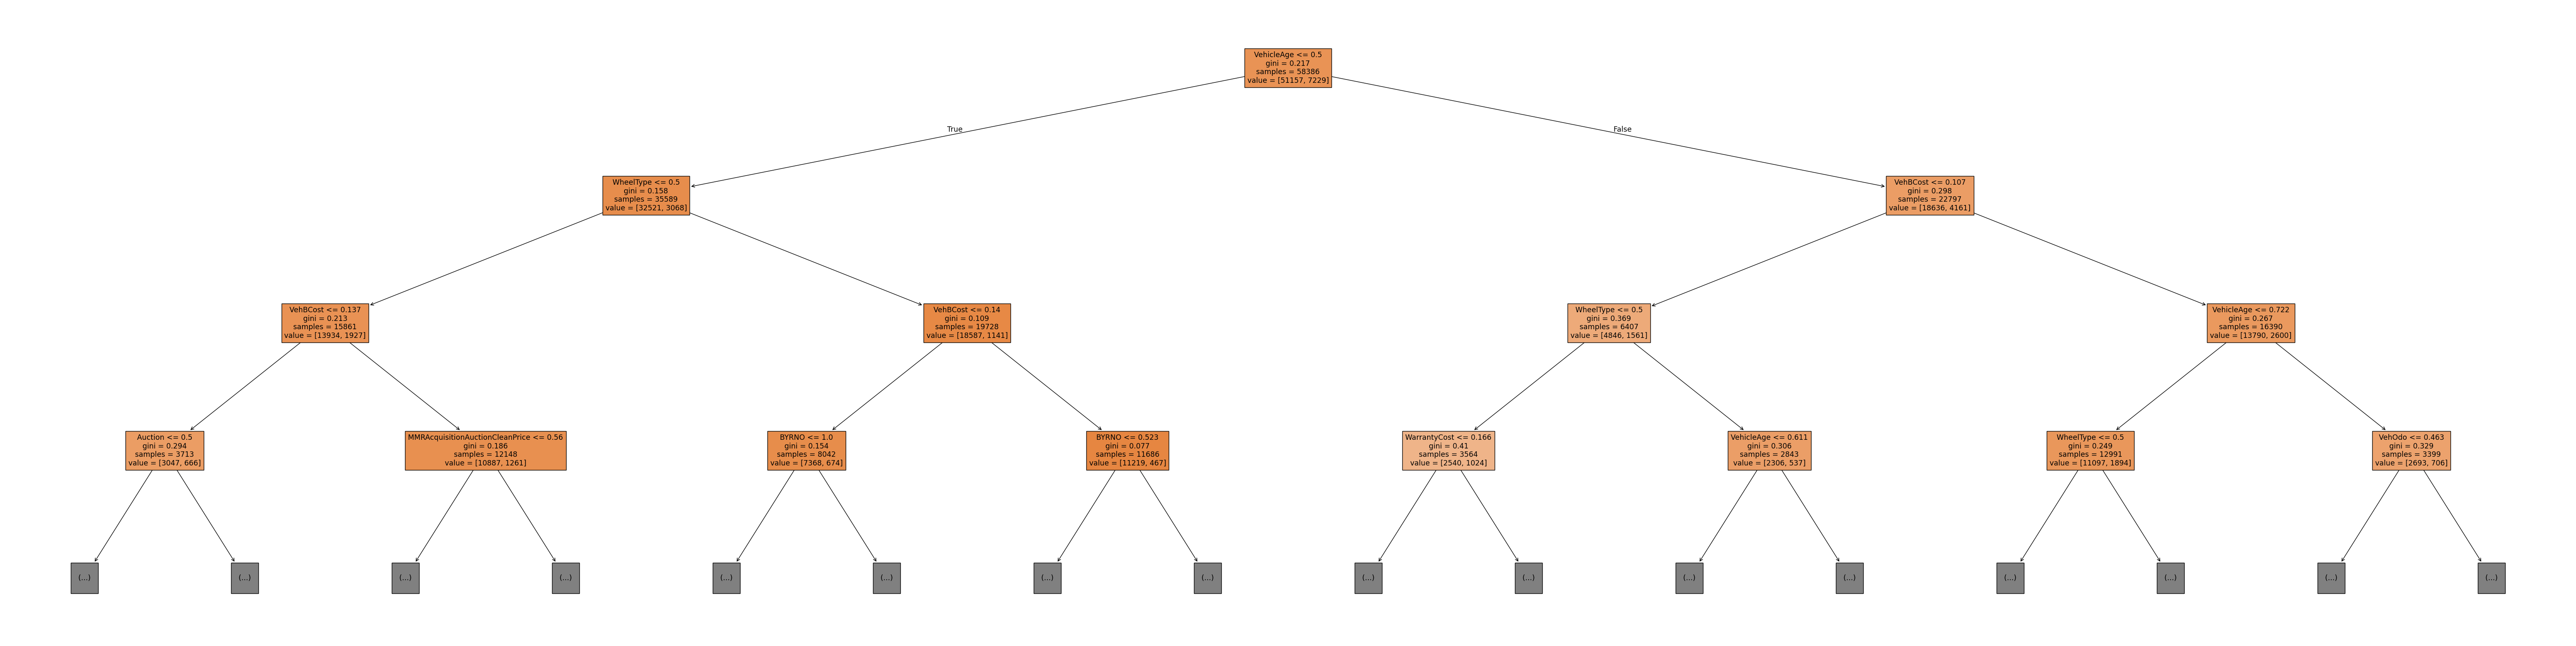

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=inputs.columns, max_depth=3, filled=True);

In [ ]:
model.tree_.max_depth

41

In [ ]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

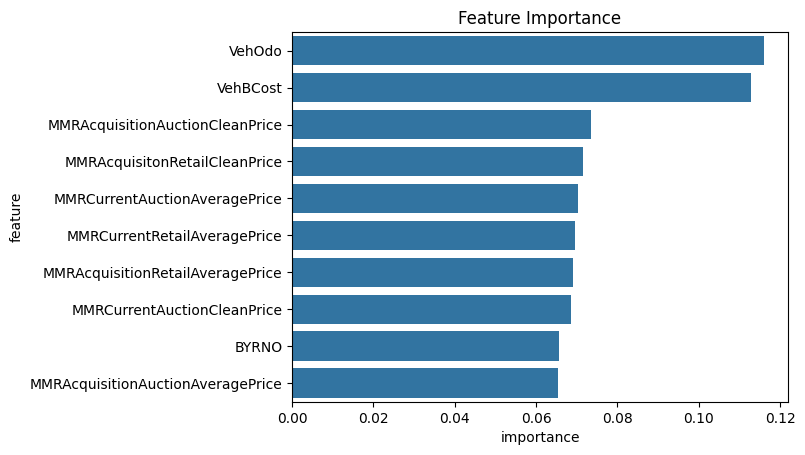

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Importance of the feature in the dataset

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

applying different values of max_depth of the tree to increase the accuracy

In [ ]:
model.fit(inputs, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(inputs, train_targets)

0.8761860720035625

In [ ]:
model.score(val_inputs, val_targets)

0.880317873535658

Now we can see that just by increasing the max depth of the tree we are getting the accuracy of 88% which is far better than 79%

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(inputs, train_targets)
    train_acc = 1 - model.score(inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [ ]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.123814          0.119682
1           2        0.123814          0.119682
2           3        0.123814          0.119682
3           4        0.123454          0.119614
4           5        0.123095          0.119614
5           6        0.122307          0.120230
6           7        0.121211          0.119819
7           8        0.119070          0.121532
8           9        0.116072          0.123382
9          10        0.111739          0.126738
10         11        0.106858          0.129616
11         12        0.101000          0.132013
12         13        0.094783          0.135713
13         14        0.087778          0.140371
14         15        0.080619          0.145646
15         16        0.073220          0.152292
16         17        0.064707          0.158457
17         18        0.057017          0.162910
18         19        0.050748          0.169144
19         20        0.044497          0.173392

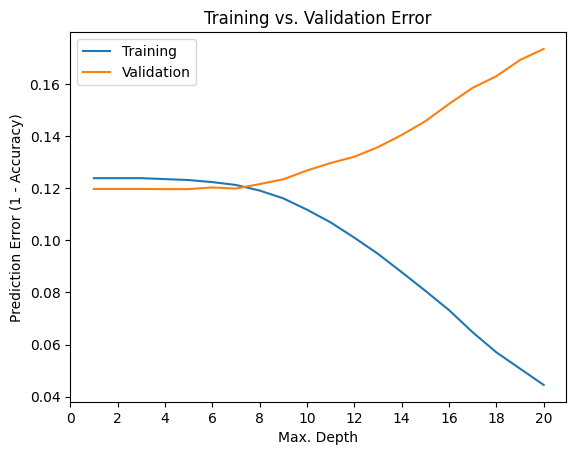

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Applying different hyperparameter values to tune the dataset

In [ ]:
model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=50,random_state=42).fit(inputs, train_targets)
model.score(val_inputs, val_targets)

0.8803863807631706

Hence we got the accuracy of 88% in Decission tree model

In [ ]:
preds=model.predict(test_df)
preds

array([0, 0, 0, ..., 0, 0, 0])

# Model 4: RandomForest Calssifier

Next we will make our random forest classifier model and we will use `RandomForestClassifier` from `sklearn.ensemble`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.fit(inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(inputs, train_targets)

0.9999657452128935

In [ ]:
model.score(val_inputs, val_targets)

0.8798383229430705

In [ ]:
train_probs = model.predict_proba(inputs)
train_probs

array([[0.95, 0.05],
       [0.95, 0.05],
       [1.  , 0.  ],
       ...,
       [0.96, 0.04],
       [0.99, 0.01],
       [0.99, 0.01]])

In [ ]:
preds=model.predict_proba(test_df)
preds

array([[0.89, 0.11],
       [0.91, 0.09],
       [0.95, 0.05],
       ...,
       [0.89, 0.11],
       [0.75, 0.25],
       [0.69, 0.31]])

In [ ]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

<ipython-input-405-e48ad8e44a85>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




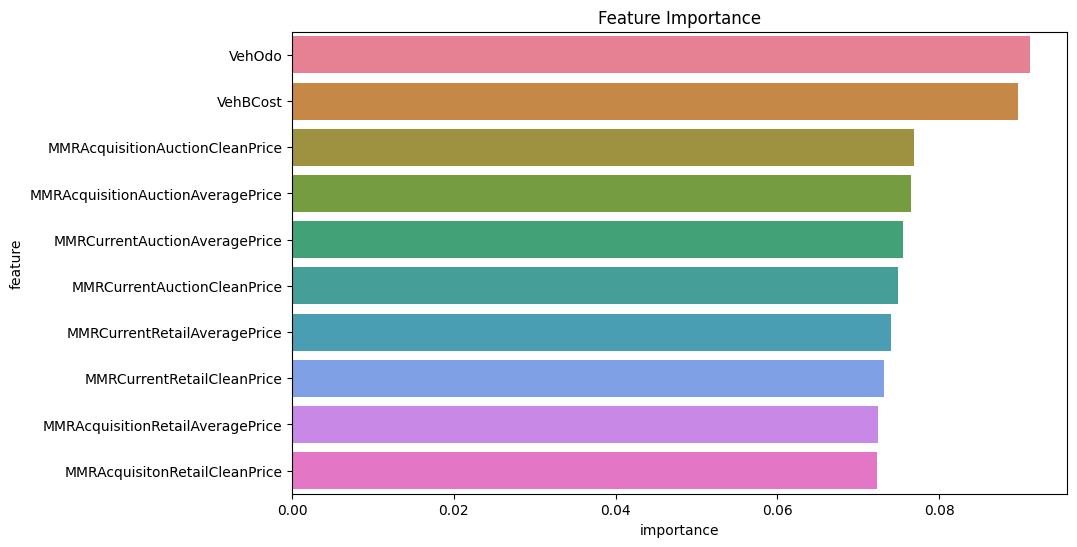

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),palette='husl',x='importance', y='feature');
plt.show()

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(inputs, train_targets)
    return model.score(inputs, train_targets), model.score(val_inputs, val_targets)

In [ ]:
test_params(max_depth=40)

(0.9999657452128935, 0.879906830170583)

In [ ]:
test_params(max_leaf_nodes=2**12)

(0.9680574110231905, 0.8803863807631706)

In [ ]:
test_params(max_features='log2')

(0.9999657452128935, 0.8798383229430705)

# Training our best Model:

Since we had the highest accuracy with random forest so let's tune our randomm forest model and since it is a recursive process let's create a function to test our hyperparameters.



In [ ]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=300,
                               max_features='log2',
                               max_depth=40,
                               class_weight={0: 1, 1: 1.6})

In [ ]:
model.fit(inputs, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.6}, max_depth=40,
                       max_features='log2', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(inputs, train_targets), model.score(val_inputs, val_targets)

(1.0, 0.880317873535658)

In [ ]:
preds=model.predict_proba(test_df)
preds

array([[0.9       , 0.1       ],
       [0.94333333, 0.05666667],
       [0.92333333, 0.07666667],
       ...,
       [0.88333333, 0.11666667],
       [0.75333333, 0.24666667],
       [0.74      , 0.26      ]])

# **Summary**

We downloaded , explored , performed EDA(Exploratory Data Analysis), cleaned the data and trained few models to automate the process of identifying that the car bought at auction is a good purchase or bad purchase.

- Training data & test data had approximately 73K rows and 34 columns.
- Prepared the dataset and removed the data which had more categories or which had high correlations
- Imputed the missing values in both categorical columns and numeric columns.
- Encoded the categorical columns with Label encoding & One hot encoding and scaled the numerical values using MinMaxScaler.
- Then split the data into train data and validation data and trained the dumb model to get the baseline for our models.
- Dataset was Imbalance , its important to balance the dataset first we applied `class_weights' parameter for balancing the data.
- Trained four models:
`LogisticRegression`,`KNNClassifier` `DecissionTree` and `RandomForest`.
Among these `RandomForest` performed better and applied hyperparameter tuning onto it so that it gave the accuracy of 89% on the validation set.

**Possible Future Work:**

- Performing better feature engineering.
- Tuning the Hyperparameter.
- performing cross-validation like k_fold.

